# 크롤링 (Crawling) & 텍스트마이닝 (Text-Mining)

## 목차 

1. 웹크롤링의 정의

   1.2 웹크롤링과 웹스크래핑의 차이
   
   
2. 웹(HTML) 구조 & 요소 구조(+CSS,Javascript) 


3. 정규표현식


4. Web-Crawling 하는 방법

   4.1 Url 불러오기 : requests vs urllib.request 
   
   4.2 BeautifulSoup
   
   4.3 Urllib & BeautifulSoup
   
       4.3.1 find() & find_all()
   
   4.4 CSS 선택자
   
   4.5 String vs get_text()
   
   4.6 접속 차단 해결법
   
   4.7 이미지 크롤링
   
   
5. 유용한 코드   

   
6. 텍스트마이닝 

   6.1 KoNLPy패키지
   
   
7. 결과 시각화

   7.1 WordCloud

--------

## 1. 웹크롤링의 정의

“spider”라고 불리는 웹 크롤러는 웹 페이지의 내부 링크를 따라 인터넷을 체계적으로 검색하여 콘텐츠를 검색하는 독립 실행형 봇

## 1.1 웹크롤링과 웹스크래핑의 차이

크롤링과 스크래핑은 ‘원하는 데이터를 모을 수 있다’는 점이 비슷하다.

- 웹 크롤링은 웹 페이지의 링크를 타고 계속해서 탐색을 이어나간다. 웹 크롤링은 페이지를 모아 색인화(분류)하고 검색 결과에 내가 찾는 키워드와 연관된 링크들만 모아 볼 수 있도록 작동합니다. 예를 들어 구글이 있다.  

- 웹 스크래핑은 데이터 추출을 원하는 대상이 명확하여 특정 웹 사이트만을 추적한다는 차이점이 있습니다. 웹 스크래핑은 상품의 가격, 주식 정보, 뉴스 등 원하는 데이터가 명확하며, 흩어져있는 해당 데이터를 자동으로 추출하여 전달한다.

출처: shorturl.at/eotxY

------

## 2. 웹 구조 & 요소 구조

- 구조
 - \<!Doctype html> : HTML5 문서를 선언하는 구문
 - \<html></html> : HTML 문서의 시작과 끝
 - \<head></head> : CSS, JavaScript, meta, title 정보들을 설정
 - \<body></body> : 실제 홈페이지 화면을 나타내는 부분

- 요소 구조
 - HTML 요소는 여러 속성들을 가질 수 있으며 속성들은 해당 요소에 대한 추가 정보를 제공
 - 시작 태그\(< >)로 시작해서 종료 태그(</>)로 끝남
 - 요소 안에 다른 요소를 작성할 수 있음 

#### HTML 태그
- p 태그를 이용하여 문단 작성
- h 태그를 이용하여 폰트 크기 설정
- ul(unordered list)과 ol(ordered list) 태그로 리스트 작성, 리스트 각각의 요소는 li(항목 나열) 태그로 표시  
- table 태그는 thead, tbody를 가질 수 있으며 표를 표현 : tr 행, th(가운데 정렬,굵은 글씨체),td 각 행의 컬럼
- input 태그와 button 태그 : 데이터를 넣는 폼과 페이지 조작 버튼 생성
- select # select 태그로 선택 리스트 생성
- a 태그로 다른 페이지로 이동. 상대경로(내가 있는 경로부터의 경로), 절대경로(항상 같은 url)
- img 태그로 이미지 포함 : src(이미지 붙임), alt(이미지 대체)
- span 태그로 p태그 처럼 글을 추가. span 태그는 옆으로 나열. br 태그 사용하여 p 태그처럼 사용
- div 태그는 화면 레이아웃을 잡는 역할 : 하위 태그들의 영역을 잡아줌

#### CSS 
- CSS로 웹 사이트를 꾸며주기 위해 해당 태그에 접근하는 방식을 크롤러에서도 사용.
- selector : CSS로 꾸미기 위해 특정 요소에 접근하는 것을 셀렉터라고 함.
  - html 파일을 만들었다면 각각의 태그에 다르게 css 를 설정 할 것입니다. 이 때, 어느 요소에 스타일을 적용할지 알려주는 방식이 바로 css 선택자 입니다.
- 태그를 이용하여 접근하면 태그는 전부 CSS 효과가 적용
- class를 이용하면 원하는 요소만 CSS 효과 적용할 수 있고 원하는 요소만 수집할 수 있음.
- id는 class와 다르게 id값이 고유해야 함(id는 한페이지에 하나만 존재해야 함)
- 부모 태그와 자식 태그를 나열하여 복잡한 셀렉터를 생성

CSS 선택자 이해

- https://ssungkang.tistory.com/entry/css-css-%EC%84%A0%ED%83%9D%EC%9E%90selector-%EC%9D%98-%EC%A2%85%EB%A5%98%EC%99%80-%EC%98%88%EC%8B%9C
- https://developer.mozilla.org/en-US/docs/Web/CSS/CSS_Selectors
- https://www.nextree.co.kr/p8468/


#### JavaScript
- 웹 사이트의 기능을 넣어줌. script 태그를 이용하여 작성. head or body 하단에 위치
- js를 이용하여 HTML 코드를 생성. 크롤러로 분석하기 가장 어려운 부분임
- DOM(Document Object Model)이란 HTML을 시각적으로 쉽게 표현하기 위해 만든 객체로 크롤러 만들 때 중요
- 데이터를 수집하기 위해 DOM을 이용해 데이터에 접근한 후 해당 데이터 수집
- 웹 브라우저는 HTML 코드를 가져온 후 JavaScript를 실행시킨 결과를 보여줌
- 소스 보기 페이지에 수집하고자 하는 요소가 없다면 네트워크 탭을 이용, 서버에서 데이터를 받아오는 지 확인
- 그렇지 않은 경우 셀레니움을 사용하여 해결

http://www.tcpschool.com/javascript/js_intro_basic


-------------------

## 3. 정규표현식

참고 사이트 :  https://hamait.tistory.com/342

## 4. Web-Crawling 하는 방법

## 4.1 Url 불러오기 : requests vs urllib.request

### 4.1.1 requests


```
    requests 모듈 : pip install requests 명령어로 설치, anaconda를 설치하면 기본 설치

    http는 요청과 응답으로 이루어져 있음
    요청/응답 구조
    요청
    GET : 정보를 가져오기 위해 요청
    POST: 새로운 정보를 보내기 위해 요청
    PUT: 수정할 정보를 보내기 위해 요청
    DELETE: 정보를 삭제하기 위해 요청
    응답
    1XX: 요청을 받았고 작업 진행 중
    2XX: 사용자의 요청이 성공적으로 수행 됨
    3XX: 요청은 완료되었으나 리다이렉션이 필요
    4XX: 사용자의 요청이 잘못됨
    5XX: 서버에 오류가 발생함
```

사용자 요청이 어떻게 수행되는지 알려준다. :

response.status_code 

'\n<!doctype html>                          <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta name="twitter:description" content="네이버
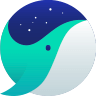
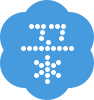

In [13]:
import requests

url='http://naver.com'
response = requests.get(url)
response.text # .text를 사용하면 내부를 볼 수 있다. 

위에 있는 결과를 읽기 쉽게 BeautifulSoup 를 사용할 수 있다. 

<!DOCTYPE html>
<html data-dark="false" lang="ko"> <head> <meta charset="utf-8"/> <title>NAVER</title> <meta content="IE=edge" http-equiv="X-UA-Compatible"/> <meta content="width=1190" name="viewport"/> <meta content="NAVER" name="apple-mobile-web-app-title"/> <meta content="index,nofollow" name="robots"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description"/> <meta content="네이버" property="og:title"/> <meta content="https://www.naver.com/" property="og:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description"/> <meta content="summary" name="twitter:card"/> <meta content="" name="twitter:title"/> <meta content="https://www.naver.com/" name="twitter:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" name="twitter:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="twitter:
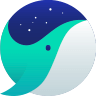
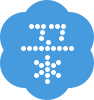

In [25]:
import requests
from bs4 import BeautifulSoup as bs

url='http://naver.com'
html = requests.get(url)
html = html.text # .text를 사용하면 내부를 볼 수 있다.
bs = bs(html,'lxml')
bs

### 4.1.2 urllib.request
```
    urllib 모듈이란: 파이썬의 표준 모듈로써 URL을 다루기 위한 모듈 패키지

    설치가 필요하지 않고 import urllib로 활용
    requests 모듈과 마찬가지로 URL과 관련된 여러가지 기능들을 제공
    하위모듈

    request : URL을 열고 읽는 모듈(HTTP 요청)
    error : request 모듈에서 발생하는 에러들을 포함하는 모듈
    parse : URL을 파싱하는 모듈(URL 해석 및 조작)
    robots.txt 파일을 파싱하는 모듈
```

In [15]:
import urllib

URL =  'https://www.naver.com'
request = urllib.request.Request(URL)
print(request)
print(request.full_url)
print(request.type)
print(request.host)

https://www.naver.com
https
www.naver.com


In [11]:
import urllib.request as rq 

url = 'http://naver.com'
html = rq.urlopen(url)
html.text # 에러가 나온다. 

AttributeError: 'HTTPResponse' object has no attribute 'text'

.text 대신 Beautifulsoup의 html parser를 사용해서 내용을 볼 수 있다. 


<!DOCTYPE html>
 <html data-dark="false" lang="ko"> <head> <meta charset="utf-8"/> <title>NAVER</title> <meta content="IE=edge" http-equiv="X-UA-Compatible"/> <meta content="width=1190" name="viewport"/> <meta content="NAVER" name="apple-mobile-web-app-title"> <meta content="index,nofollow" name="robots"> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description"> <meta content="네이버" property="og:title"/> <meta content="https://www.naver.com/" property="og:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description"> <meta content="summary" name="twitter:card"/> <meta content="" name="twitter:title"/> <meta content="https://www.naver.com/" name="twitter:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" name="twitter:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="twitter:de
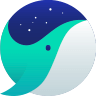
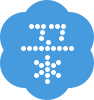

In [21]:
import urllib.request as rq 
from bs4 import BeautifulSoup as bs

url = 'http://naver.com'
#urlopen(): 해당 url을 열기. request 객체 또는 URL을 직접 넣어도 가능합니다.
html = rq.urlopen(url)
soup = bs(html, 'html.parser')
soup

여기서 BeautifulSoup의 prettify() 를 사용하면 내용을 더 읽기 쉽게 볼 수 있다.

<!DOCTYPE html>
<html data-dark="false" lang="ko">
 <head>
  <meta charset="utf-8"/>
  <title>
   NAVER
  </title>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=1190" name="viewport"/>
  <meta content="NAVER" name="apple-mobile-web-app-title">
   <meta content="index,nofollow" name="robots">
    <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description">
     <meta content="네이버" property="og:title"/>
     <meta content="https://www.naver.com/" property="og:url"/>
     <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/>
     <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description">
      <meta content="summary" name="twitter:card"/>
      <meta content="" name="twitter:title"/>
      <meta content="https://www.naver.com/" name="twitter:url"/>
      <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" name="twitter:image"/
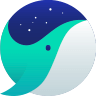
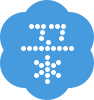

In [17]:
print(soup.prettify())

-------------

## 4.2 BeautifulSoup

HTML정보로 부터 원하는 데이터를 가져오기 쉽게,

비슷한 분류의 데이터별로 나누어주는(parsing) 파이썬 라이브러리

( 보통 html정보를 가져오는 urllib.request.urlopen() 모듈과 함께 사용되곤 합니다. )

참고 사이트 : https://defineall.tistory.com/640

In [61]:
html_doc = """<html><head><title>The Dormouse's story</title></head>
<body>
<div></div>
<p class="title"><b>The Dormouse's story</b></p>

<p class="story">Once upon a time there were three little sisters; and their names were
<a href="http://example.com/elsie" class="sister" id="link1">Elsie</a>,
<a href="http://example.com/lacie" class="sister" id="link2">Lacie</a> and
<a href="http://example.com/tillie" class="sister" id="link3">Tillie</a>;
and they lived at the bottom of a well.</p>

<p class="story">...</p>
"""

In [62]:
from bs4 import BeautifulSoup 

bs = BeautifulSoup(html_doc,'html.parser') # lxml
print(bs.prettify())

<html>
 <head>
  <title>
   The Dormouse's story
  </title>
 </head>
 <body>
  <div>
  </div>
  <p class="title">
   <b>
    The Dormouse's story
   </b>
  </p>
  <p class="story">
   Once upon a time there were three little sisters; and their names were
   <a class="sister" href="http://example.com/elsie" id="link1">
    Elsie
   </a>
   ,
   <a class="sister" href="http://example.com/lacie" id="link2">
    Lacie
   </a>
   and
   <a class="sister" href="http://example.com/tillie" id="link3">
    Tillie
   </a>
   ;
and they lived at the bottom of a well.
  </p>
  <p class="story">
   ...
  </p>
 </body>
</html>


In [49]:
bs.title.text # 타이틀 태그의 문자열 읽어오기

"The Dormouse's story"

In [50]:
bs.title.name # 타이틀 태그의 이름 읽어오기

'title'

In [51]:
bs.title.parent.name # 타이틀 태그의 부모 읽어오기

'head'

In [52]:
# 특정 태그 전체 읽어오기 예시. p 태그 와 a 태그 
print(bs.p)
print(bs.a)

<p class="title"><b>The Dormouse's story</b></p>
<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>


### 4.3.1 find() 와 find_all()

In [53]:
# find_all()  을 사용하여 찾고 싶은 특정 태그 전체를 읽어올 수 있다.

bs.find_all('a')

[<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>,
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>]

In [54]:
# find() 을 사용하여 찾고 싶은 특정 태그를 하나 읽어올 수 있다.

bs.find('a')

<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>

In [55]:
# 아이디를 사용하여 태그를 읽어올 수 있다.

bs.find(id='link3')

<a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>

####  limit 를 사용하여 필요한 수만큼만 읽어올 수 있다.

In [56]:
from bs4 import BeautifulSoup
import urllib.request as rq

url= 'https://naver.com/'
html = rq.urlopen(url)
bs = BeautifulSoup(html,'lxml')

print(bs.find_all('p',limit=2))

[<p class="dsc">
<i class="imsc ico_election"></i><span class="_alert_passage"></span>
</p>, <p class="dsc">ON/OFF 설정은<br/>해당기기(브라우저)에 저장됩니다.</p>]


In [63]:
# 특정 태그의 클래스 이름을 읽어올 수 있다.
bs.a['class']

['sister']

In [64]:
# 특정 태그의 아이디 이름을 읽어올 수 있다.
bs.a['id'] # 세개가 있어도 하나만 나온다.

'link1'

In [65]:
# 각 태그의 특정 속성들의 문자열을 읽어 올 수 있다.
for link in bs.find_all('a'):
    print(link.get('href'))

http://example.com/elsie
http://example.com/lacie
http://example.com/tillie


In [70]:
# 태그안 특정 태그를 전부 읽어 올 수 있다.
bs.find('body').find_all('a')

[<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>,
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>]

## 4.3 Urllib & BeautifulSoup

In [ ]:
import urllib.request as rq 

url = 'https://news.naver.com/main/main.naver?mode=LSD&mid=shm&sid1=100'
html = rq.urlopen(url)
bs = BeautifulSoup(html,'lxml')
text = bs.find('p')
text= text.get_text()
text

## 4.4 CSS 선택자

```
    원하는 정보만 선별하여 수집하고 싶을 때 css선택자를 활용할 수 있음
    (CSS 선택자 설명 추가)
    F12 >> 수집하고 싶은 부분 클릭 >> 태그 선택 >> copy Selector
    BeautifulSoup의 select_one, select 활용
    
```

In [77]:
import requests as rq
from bs4 import BeautifulSoup

url = 'https://news.daum.net/politics#1/'
r = rq.get(url)
html = r.text
bs = BeautifulSoup(html,'lxml')
lines = bs.select('body > div > main > section > div > div > ul > li > strong > a')
body = '\n'.join([line.text for line in lines])
print(body)

썰전라이브_[97 토론 'B컷'] 박주민 "외모는 내가.."
[썰전라이브] 박주민 "86은 반사체..97은 '자기 이야기' 있어"
"내부 정보로 땅 사고, 농지도 불법 취득"..LH 임직원 25명 수사의뢰
[썰전라이브] 박용진 "이재명, 혁신의 주체 아닌 쇄신의 대상"
북핵수석, 中에 '담대한 계획' 소개..中 원론 답변
[정면승부] 설훈 "경찰모임 쿠데타 비유, 그런 소리 하는 분들 당장 탄핵해야"
"이준석 팽 맞네"..尹-권성동 문자에 민주 비판 잇따라
[뉴스하이킥] 임은정 "윤 대통령은 측근을 지켰고 나는 법을 지켜, 20년 뒤 역사의 평가 받아야"
尹 "내부 총질하던 당대표" 메시지 포착..친정체제 구축 尹心 담겼나
"마무리할게요"→"질문 더 받죠"..브리핑을 간담회로 만든 한동훈


In [78]:
url = 'https://news.daum.net/politics#1/'
r = rq.get(url)
html = r.text
bs = BeautifulSoup(html,'lxml')
line = bs.select_one('body > div.container-doc.cont-category > main > section > div.main-sub > div.box_g.box_news_major > ul > li:nth-child(1) > strong > a')
print(line.text)

썰전라이브_[97 토론 'B컷'] 박주민 "외모는 내가.."


In [79]:
url = 'https://news.v.daum.net/v/20220726105712920'
r = rq.get(url)
html = r.text
bs = BeautifulSoup(html,'lxml')
lines = bs.select('#harmonyContainer > section > p')
article = [line.text for line in lines]
article = ' '.join(article)
article

''

## 4.5 String vs get_text()

- get_text()를 이용하면 한방에 현재 HTML 문서의 모든 텍스트를 추출할 수 있습니다. 조금 더 정확히 표현하면 get_text() 메서드는 현재 태그를 포함하여 모든 하위 태그를 제거하고 유니코드 텍스트만 들어있는 문자열을 반환
- string의 경우 문자열이 없으면 None을 출력하지만, get_text()의 경우 유니코드 형식으로 텍스트까지 문자열로 반환하기 때문에  아무 정보도 출력되지 않는다.
- string 속성은 태그(tag) 내 문자열을 반환. get_text()를 사용하더라도 정확하게 문자열을 추출하기 위해서는 항상 마지막 태그에 메서드를 사용


## 4.6 접속 차단 해결법

접속 차단되었을 때는 로봇이 아닌 것을 알려주기 위해서 headers 속성을 지정해야 한다.(User-Agent지정(header))

https://www.whatismybrowser.com/detect/what-is-my-user-agent/

In [44]:
from bs4 import BeautifulSoup
import requests

headers = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36'}

url = 'https://news.naver.com/'
req = requests.get(url, headers=headers)
bs = BeautifulSoup(req.content, 'html.parser')

## 4.7 이미지 크롤링

In [76]:
import requests as rq
from bs4 import BeautifulSoup

headers = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36'}

url = 'https://n.news.naver.com/article/087/0000914194?cds=news_media_pc&type=editn'
r= rq.get(url, headers=headers).text
bs= BeautifulSoup(r,'lxml')
target = bs.select_one('#img1')
print(target)
print('-'*100)
print(target['data-src'])
# 이미지 링크 추출 

<img class="_LAZY_LOADING" data-src="https://imgnews.pstatic.net/image/087/2022/07/26/0000914194_001_20220726112901218.jpg?type=w647" id="img1"/>
----------------------------------------------------------------------------------------------------
https://imgnews.pstatic.net/image/087/2022/07/26/0000914194_001_20220726112901218.jpg?type=w647


----------------------

## 5. 유용한 코드

#### 한글과 숫자가 연결된 요소들만 추출 

re.findall('[가-힣]+|[가-힣]+\d+|\d+[가-힣]+',info) 

#### 불필요한 공백들 전부 제거 

re.sub('^\s+|\s+$|\s{2,}','',info) # 불필요한 공백들을 전부 제거

예시

In [72]:
import urllib.request as rq
import re

url = 'https://www.weather.go.kr/plus/land/forecast/summary.jsp?stnId=105&x=40&y=10'
html = rq.urlopen(url)
bs= BeautifulSoup(html,'lxml')
for text in bs.find_all('p'):
    for info in text.find_all('span'): # p 태그 안에 있는 span 태그만 추출 
        info = info.get_text()
        info =  re.findall('[가-힣]+|[가-힣]+\d+|\d+[가-힣]+',info) # 한글과 숫자가 연결된 요소들만 추출 
        info = ' '.join(info) # 위에서는 한글들만 추출 된 요소들이 list 안에 있으니 전부를 하나로 묶어줌, 이때 스페이스로 분리
        info = re.sub('^\s+|\s+$|\s{2,}','',info) # 불필요한 공백들을 전부 제거
        print(info)

2022년 07월 26일 화 요일 발표
종합 무더위 유의 오늘과 내일 강원영서 중심 소나기 곳 돌풍과 천둥 번개 유의
오늘 가끔 구름많음 오후 18시 부터 저녁 21시 사이 강원영서 소나기 곳
내일 가끔 구름많음 오후 18시 부터 저녁 21시 사이 강원영서 소나기 곳
모레 강원영서 구름많음 강원영동 대체로 흐림
소나기에 의한 예상 강수량
26일 강원영서
27일 강원영서


-----------------

## 6. 텍스트마이닝

### 6.1 KoNLPy패키지

KoNLPy(코엔엘파이라고 읽는다)는 한국어 정보처리를 위한 파이썬 패키지이다.

참고 사이트 : https://datascienceschool.net/03%20machine%20learning/03.01.02%20KoNLPy%20%ED%95%9C%EA%B5%AD%EC%96%B4%20%EC%B2%98%EB%A6%AC%20%ED%8C%A8%ED%82%A4%EC%A7%80.html

- OKT 

참고 사이트 :  https://needjarvis.tistory.com/645

-------------

## 7. 결과 시각화

### 7.1 WordCloud

단어 리스트를 Counter 함수를 이용해 각 단어의 빈도수를 계산해서 딕셔너리 형식으로 저장한다. 

예시)

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

nouns = ' '.join(cat_100_df['news'].values) # news 컬럼에 있는 텍스트를 연결하기
nouns = nouns.split() # 단어가 스페이스로 구분되어 있기 때문에

word_cloud_lst = Counter(nouns)
wordcloud = WordCloud(font_path='../visualization/dataset/malgun.ttf',max_font_size=50, max_words=100, background_color="white").generate_from_frequencies(word_cloud_lst)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

-------